# Лабораторная работа №8

In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import math

## Задание №1
Выполните задания из файла https://cloud.mail.ru/public/DGCu/Kw2Q4xGwd. Данные можно
взять здесь https://cloud.mail.ru/public/CiBD/PEaCv9DyD.

1. Загрузите выборку из файла titanic.csv с помощью пакета Pandas.

In [2]:
df = pd.read_csv('./train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Оставьте в выборке четыре признака: класс пассажира (Pclass), цену билета (Fare), возраст пассажира (Age) и его пол (Sex).
3. Обратите внимание, что признак Sex имеет строковые значения.
4. Выделите целевую переменную — она записана в столбце Survived.
5. В данных есть пропущенные значения — например, для некоторых
пассажиров неизвестен их возраст. Такие записи при чтении их в
pandas принимают значение nan. Найдите все объекты, у которых
есть пропущенные признаки, и удалите их из выборки.

In [3]:
df_no_missing = df[['Survived', 'Pclass', 'Fare', 'Age', 'Sex']].dropna()
X_train_withStrings = df_no_missing[['Pclass', 'Fare', 'Age', 'Sex']]
y_train = df_no_missing['Survived']

def strings_to_int(df, target_column):
    df_mod = df.copy()
    targets_to_rename = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets_to_rename)}
    df_mod[target_column] = df_mod[target_column].replace(map_to_int)

    return df_mod

X_train = strings_to_int(X_train_withStrings, "Sex")
X_train.head()

,Pclass,Fare,Age,Sex
PassengerId,,,,
1,3,7.2500,22.0,0
2,1,71.2833,38.0,1
3,3,7.9250,26.0,1
4,1,53.1000,35.0,1
5,3,8.0500,35.0,0


6. Обучите решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию.


In [4]:
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=241)

7. Вычислите важности признаков и найдите два признака с наибольшей важностью. Их названия будут ответами для данной задачи
(в качестве ответа укажите названия признаков через запятую без
пробелов).

In [5]:
importances = pd.Series(clf.feature_importances_, index = list(X_train))
importances

Pclass    0.147518
Fare      0.295385
Age       0.256585
Sex       0.300512
dtype: float64

In [6]:
print(' '.join(importances.sort_values(ascending=False).head(2).index.values))

Sex Fare


## Задание №2
Построить дерево решений, определяющее наличие сахарного диабета у женщин. Данные
возьмите отсюда https://cloud.mail.ru/public/XD8U/pgDYnHrjY.
Данные содержат следующие характеристики:

1. Pregnancies – число случаев беременности
2. Glucose – концентрация глюкозы в крови
3. BloodPressure – артериальное диастолическое давление (мм рт. ст.)
4. SkinThickness – толщина кожной складки трехглавой мышцы (мм)
5. Insulin – 2-х часовой сывороточный инсулин
6. BMI – индекс массы тела
7. DiabetesPedigreeFunction – числовой параметр наследственности диабета
8. Age – возраст

Outcome – целевая переменная: 1 – наличие заболевания, 0 – отсутствие
Проделайте следующие действия:

1. Загрузите данные в DataFrame с помощью функции read_csv библиотеки pandas.
2. Разделите данные на обучающую и тестовую выборки с помощью функции train_test_split.
3. Постройте дерево решений с помощью класса DecisionTreeClassifier.
4. Оцените качество модели с помощью функции classification_report.
5. Подберите оптимальное значение гиперпараметра max_depth с помощью поиска по сетке (класс GridSearchCV).
6. Обучите модель с оптимальным max_depth и оцените результат.

Подсказка к заданию:

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 5, 10, 20, 100]} # можно указать другие значения

dtc = DecisionTreeClassifier()

grid = GridSearchCV(dtc, parameters)

grid.fit(X_train, y_train)

grid.best_estimator_ # лучшая модель

1. Загрузите данные в DataFrame с помощью функции read_csv библиотеки pandas.

In [7]:
df = pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


2. Разделите данные на обучающую и тестовую выборки с помощью функции
train_test_split.

In [8]:
df = df.dropna()
X = df.drop(["Outcome"], axis=1)
y = df.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

3. Постройте дерево решений с помощью класса DecisionTreeClassifier

In [9]:
clf = DecisionTreeClassifier(random_state=241)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=241)

4. Оцените качество модели с помощью функции classification_report.

In [10]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       206
           1       0.55      0.72      0.62       102

    accuracy                           0.71       308
   macro avg       0.69      0.71      0.70       308
weighted avg       0.74      0.71      0.72       308



5. Подберите оптимальное значение гиперпараметра max_depth с помощью поиска по
сетке (класс GridSearchCV).

6. Обучите модель с оптимальным max_depth и оцените результат

In [11]:
parameters = {'max_depth': range(3, 100, 1)}
dtc = DecisionTreeClassifier()
grid = GridSearchCV(dtc, parameters)
grid.fit(X_train, y_train)
grid.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [12]:
dtc = DecisionTreeClassifier(max_depth=4)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       206
           1       0.58      0.77      0.66       102

    accuracy                           0.74       308
   macro avg       0.72      0.75      0.72       308
weighted avg       0.77      0.74      0.74       308



## Задание №3
Выполните задания из файла https://cloud.mail.ru/public/2Btw/56cT2htNd. Данные можно
взять здесь https://cloud.mail.ru/public/mMAE/P3SZLgJWQ. 

1. Загрузите набор данных из файла «winequality-red.csv» в DataFrame. 

In [13]:
df = pd.read_csv('./winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


2. Обучите модель случайного леса (RandomForestClassifier).

In [14]:
df = df.dropna()
X = df.drop(["quality"], axis=1)
y = df.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

In [15]:
clf = RandomForestClassifier(random_state=241)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=241)

3. Оцените качество модели. Метрики для оценки качества выберите
самостоятельно. 

In [16]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       303
           1       0.79      0.82      0.80       337

    accuracy                           0.79       640
   macro avg       0.79      0.79      0.79       640
weighted avg       0.79      0.79      0.79       640



4. Оцените информативность признаков с помощью атрибута
feature_importances_.

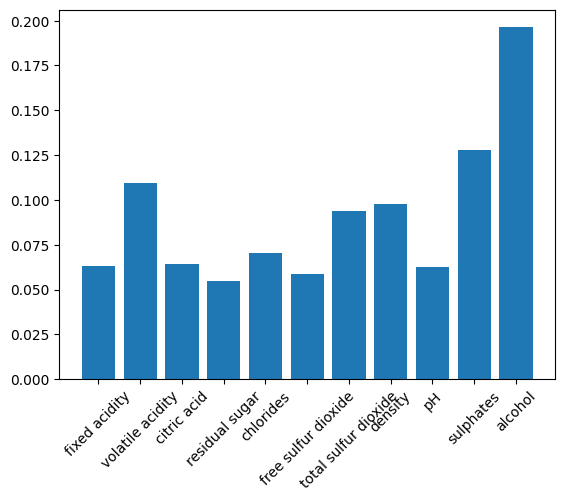

In [17]:
plt.bar(df.columns[:-1], clf.feature_importances_)
plt.xticks(rotation=45)
plt.show()

## Задание №4
Выполните задания из файла https://cloud.mail.ru/public/nbue/PCozBiM4f. Данные можно
взять здесь https://cloud.mail.ru/public/ysqp/AuPY2gpwo.

1. Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим
измерениям.


In [18]:
df = pd.read_csv('./abalone_csv.csv')
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


2. Преобразуйте признак Sex в числовой: значение F должно перейти
в -1, I — в 0, M — в 1. Если вы используете Pandas, то подойдет
следующий код: data[’Sex’] = data[’Sex’].map(lambda x: 1 if x ==
’M’ else (-1 if x == ’F’ else 0))

In [19]:
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


3. Разделите содержимое файлов на признаки и целевую переменную.
В последнем столбце записана целевая переменная, в остальных —
признаки.


In [20]:
y = df.loc[:, 'Class_number_of_rings']
X = df.drop('Class_number_of_rings', axis = 1)

4. Обучите случайный лес (sklearn.ensemble.RandomForestRegressor)
с различным числом деревьев: от 1 до 50 (random_state=1). Для
каждого из вариантов оцените качество работы полученного леса
на кросс-валидации по 5 блокам. Используйте параметры
"random_state=1"и "shuffle=True"при создании генератора кроссвалидации sklearn.cross_validation.KFold. В качестве меры качества
воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

In [22]:
scores = []
validator = KFold(shuffle=True, random_state=1, n_splits=5)
for n_est in tqdm(range(1, 51)):
    clf = RandomForestRegressor(random_state=1, n_estimators=n_est)
    clf.fit(X, y)
    scores.append((n_est, cross_val_score(clf, X, y, cv=validator, scoring=lambda est, X, y: r2_score(y, est.predict(X))).mean()))

  0%|          | 0/50 [00:00<?, ?it/s]

5. Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это
количество и будет ответом на задание.

In [27]:
for score in scores:
    if score[1] > 0.52:
        print(score)
        break

(21, 0.520529096463528)


6. Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?


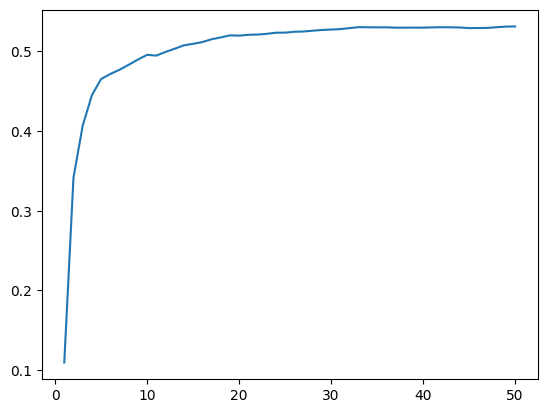

In [29]:
plt.plot([score[0] for score in scores], [score[1] for score in scores])
plt.show()

Качество улучшается

## Задание №5

Выполните задания из файла https://cloud.mail.ru/public/YQ1s/9LJK7ZWuT. Данные можно
взять здесь https://cloud.mail.ru/public/RE1b/eRFQujUhe.

1. Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В
первой колонке файла с данными записано, была или нет реакция.
Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку
на обучающую и тестовую, используя функцию train_test_split с
параметрами test_size = 0.8 и random_state = 241.


In [33]:
df = pd.read_csv('./gbm-data.csv')
y = df.loc[:, 'Activity']
X = df.drop('Activity', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.8, random_state = 241)

2. Обучите GradientBoostingClassifier с параметрами n_estimators=250,
verbose=True, random_state=241 и для каждого значения learning_rate
из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
• Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой
итерации.
• Преобразуйте полученное предсказание по формуле 1
1+e
−y_pred ,
где y_pred — предсказанное значение.
• Вычислите и постройте график значений log-loss на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

In [34]:
def sig(y_pred):
    return 1. / (1. + math.e ** -y_pred)

Rate: 1.0
Min @test:
[(1, 0.5822942594278475)]


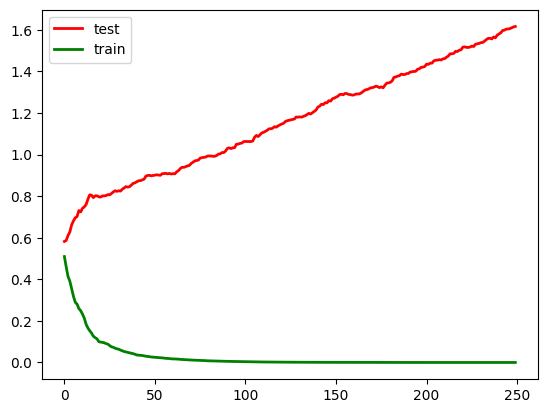

Rate: 0.5
Min @test:
[(7, 0.5580566460434663)]


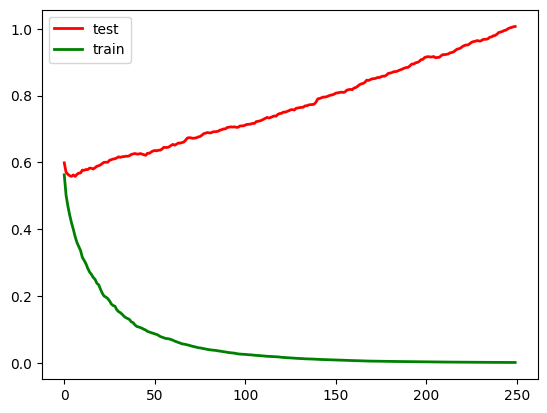

Rate: 0.3
Min @test:
[(11, 0.5432962175088122)]


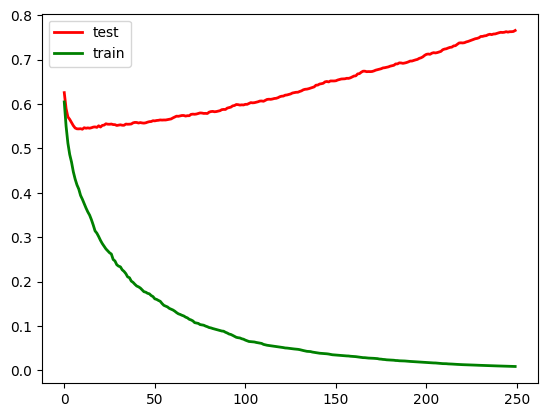

Rate: 0.2
Min @test:
[(37, 0.5298828667860297)]


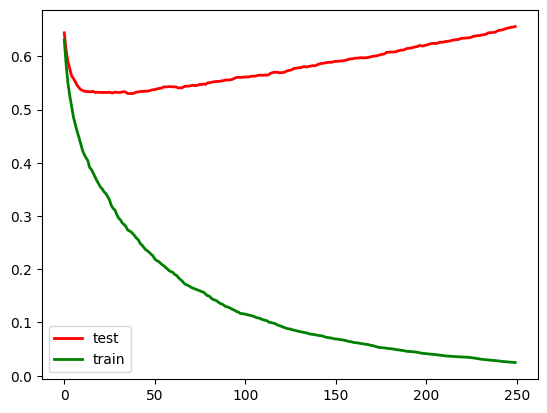

Rate: 0.1
Min @test:
[(52, 0.5258476671782405)]


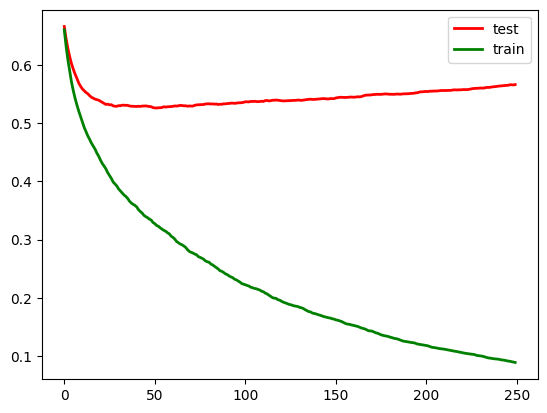

In [41]:
for rate in [1., 0.5, 0.3, 0.2, 0.1]:
    print('Rate: ' + str(rate))
    clf = GradientBoostingClassifier(learning_rate = rate, n_estimators=250, verbose=False, random_state=241)
    clf.fit(X_train, y_train)
    test_loss = [log_loss(y_test, sig(y_pred)) for y_pred in clf.staged_decision_function(X_test)]
    train_loss = [log_loss(y_train, sig(y_pred)) for y_pred in clf.staged_decision_function(X_train)]
    print('Min @test:'),
    min_loss = min(test_loss)
    print([tuple_ for tuple_ in zip(range(1, len(test_loss)), test_loss) if tuple_[1] == min_loss])
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.show()

3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или
недообучение (underfitting)? В ответе укажите одно из слов overfitting
либо underfitting.

overfitting

4. Приведите минимальное значение log-loss на тестовой выборке и
номер итерации, на котором оно достигается, при learning_rate = 0.2.


0.529, 37

5. На этих же данных обучите RandomForestClassifier с количеством
деревьев, равным количеству итераций, на котором достигается
наилучшее качество у градиентного бустинга из предыдущего пункта, random_state=241 и остальными параметрами по умолчанию.
Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью
функции predict_proba. В данном случае брать сигмоиду от оценки
вероятности класса не нужно)

In [42]:
clf = GradientBoostingClassifier(n_estimators=37, verbose=False, random_state=241)
clf.fit(X_train, y_train)
test_loss = [log_loss(y_test, sig(y_pred)) for y_pred in clf.staged_decision_function(X_test)]
print(test_loss[-1])

0.5293567338983475


In [43]:
print(log_loss(y_test, clf.predict_proba(X_test)))

0.5293567338983475
